# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, GridSearchCV

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [116]:
data = pd.read_csv('../data/spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [117]:
# рассчитайте частоты для классов
data.groupby('label').size()

label
0    2500
1     500
dtype: int64

<Axes: xlabel='label'>

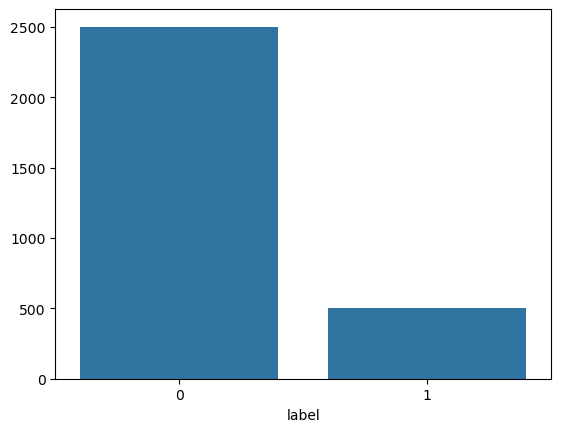

In [118]:
# визуализируйте результат
sns.barplot(data.groupby('label').size())

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
data_copy= data.copy()
data.shape

(3000, 2)

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [120]:
data['email'] = data['email'].replace('^\s+$', '', regex=True)
data = data.dropna(axis=0)
data.shape

(2999, 2)

Переводим данные в векторный вид:

In [121]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['email'])

Определите, сколько теперь признаков в нашем наборе данных:

In [122]:
X.shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [123]:
X = X
y = data["label"]

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [125]:
print(f"Среднее значение: {round(y_test.mean(),2)}")

Среднее значение: 0.17


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [126]:
from sklearn.naive_bayes import ComplementNB

clf =  ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [127]:
from sklearn.metrics import *
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9893333333333333
Confusion Matrix:
 [[624   1]
 [  7 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       625
           1       0.99      0.94      0.97       125

    accuracy                           0.99       750
   macro avg       0.99      0.97      0.98       750
weighted avg       0.99      0.99      0.99       750



Нарисуйте ROC-кривую:

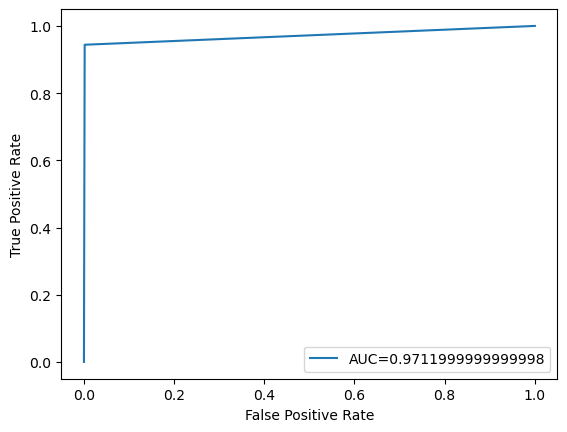

In [128]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

Best alpha (0.0 < alpha < 4.0) based on F1-score: 0.6315797894736842
Best alpha (0.0 < alpha < 4.0) based on accuracy: 0.6315797894736842


Text(0.5, 1.0, 'зависимость f1-score & accuracy от alpha')

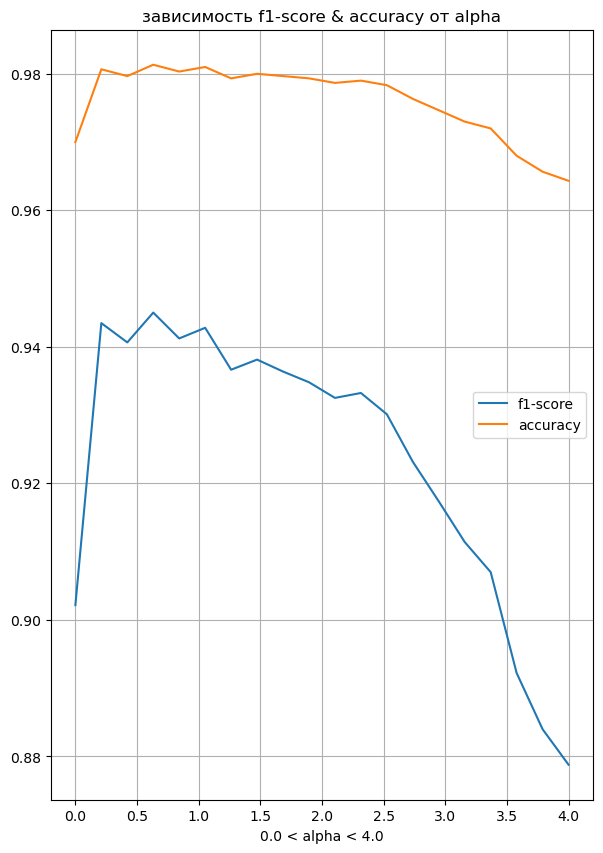

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import ComplementNB

alpha_range = np.linspace(0.000001,4,20)
f1_scores = []
accuracy = []

for alpha in alpha_range:
    cnb = ComplementNB(alpha=alpha)
    f1 = cross_val_score(cnb, X, y, cv=5, scoring='f1')
    acc = cross_val_score(cnb, X, y, cv=5, scoring='accuracy')
    accuracy.append(acc.mean())
    f1_scores.append(f1.mean())

best_alpha_f1 = alpha_range[np.argmax(f1_scores)]
best_alpha_acc = alpha_range[np.argmax(accuracy)]

print("Best alpha (0.0 < alpha < 4.0) based on F1-score:", best_alpha_f1)
print("Best alpha (0.0 < alpha < 4.0) based on accuracy:", best_alpha_acc)

plt.figure(figsize=(7, 10))  

plt.plot(alpha_range, f1_scores, label='f1-score') 
plt.plot(alpha_range, accuracy, label='accuracy')

plt.grid(True) 
plt.xlabel('0.0 < alpha < 4.0') 
plt.legend(loc=7) 
plt.title('зависимость f1-score & accuracy от alpha')  


Параметр альфа влияет на качество классификации. 